# Тесты на нормальность

Важным моментом принятия решения при работе с выборкой данных является использование **параметрических** или **непараметрических** статистических методов.

**Параметрические статистические методы** предполагают, что данные имеют известное и конкретное распределение, часто **распределение Гаусса**. Если выборка данных не является гауссовой, то допущения параметрических статистических тестов нарушаются и необходимо использовать **непараметрические статистические методы**.

Существует ряд методов, которые мы можем использовать, чтобы проверить, отклоняется ли ваша выборка данных от распределения Гаусса, называемых **тестами на нормальность**.

В этом уроке мы рассмотрим статистические тесты, которые можно использовать, чтобы проверить, имеют ли данные **нормальное распределение (распределение Гаусса)**.

## Предположение о нормальности

Большая часть статистических исследований связана с предположениями, что данные были получены из распределения Гаусса.

Если используются методы, предполагающие распределение по Гауссу, а данные были взяты из другого распределения, результаты могут быть ошибочными или просто неверными.

Существует ряд методов, с помощью которых можно проверить, является ли выборка данных гауссовской или достаточно гауссовой, чтобы использовать стандартные методы. Это ключевой момент при выборе статистических методов обработки данных. 

## Тестовый набор данных

Прежде чем мы начнем рассматривать тесты на нормальность, давайте сначала разработаем тестовый набор данных, который мы будем использовать в этом уроке. Сгенерируем небольшую выборку случайных чисел с Гауссовым распределением.

Выбор гауссовых случайных чисел для тестового набора данных означает, что мы ожидаем от каждого теста правильной идентификации распределени. Тем не менее небольшой размер выборки может вносить некоторый шум в результаты и вызывать отклонение от Гауссова распределения.

Мы будем использовать функцию **randn()** из пакета **NumPy** для генерации случайных чисел Гаусса со **средним значением 0** и **стандартным отклонением 1**, так называемых **стандартных нормальных переменных**. Затем мы сдвинем их, чтобы среднее значение было равным **50** и стандартное отклонение, равным **5**.

In [ ]:
# Генерация данных с Гауссовым распределением
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# запуск генератора случайных чисел
seed(1)
# генерирация вектора значений
data = 5 * randn(100) + 50
# оценка
print('среднее=%.3f стандартное отклонение=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


При выполнении примера создается вектор значений и печатается среднее значение и стандартное отклонение.

Мы видим, что среднее значение и стандартное отклонение являются разумными, но грубыми оценками истинного среднего значения и стандартного отклонения основной совокупности, учитывая небольшой размер выборки.

## Визуальные проверки нормальности

Мы можем создать графики данных, чтобы проверить, являются ли они гауссовыми. 

Эти проверки являются качественными, поэтому они менее точны, чем статистические методы, которые мы используем в следующем разделе. Тем не менее, они выполняются значительно бысрее и нужно уметь их интерпретировать.

В этом разделе мы рассмотрим два распространенных метода визуальной проверки набора данных, чтобы проверить, был ли он получен из распределения Гаусса.

### Гистограмма

Простым и часто используемым графиком для быстрой проверки распределения выборки данных является **гистограмма**.

В гистограмме данные разделены на предварительно заданное количество групп, называемых **бинами**. Затем данные сортируются по каждому бину, и количество наблюдений в каждом бине сохраняется.

На графике показаны бины по оси X, сохраняющие их порядковые отношения, и количество в каждом бине по оси Y.

Выборка данных имеет гауссово распределение на гистограмме, показывающее знакомую форму колокола.

Гистограмму можно создать с помощью функции **hist()** пакета **matplotlib**. По умолчанию количество бинов автоматически оценивается из выборки данных.

Полный пример, демонстрирующий график гистограммы для нашего примера с исходными данными, приведен ниже.

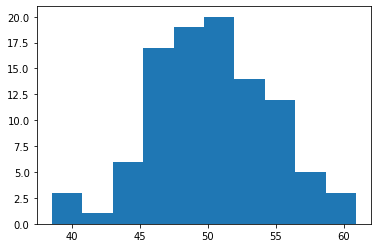

In [ ]:
# График гистограммы
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# запуск генератора случайных чисел
seed(1)
# генерирация вектора значений
data = 5 * randn(100) + 50
# построение гистограммы
pyplot.hist(data)
pyplot.show()

При выполнении программного кода создается график гистограммы, показывающий количество наблюдений в каждом интервале.

Мы можем видеть гауссову форму, которая, хотя и не является сильно знакомой колоколообразной формой, является грубым ее приближением.

### Квантиль-квантильный (QQ) график

Другим популярным графиком для проверки распределения выборки данных является **график квантиль-квантилей (график QQ)**.

Этот график генерирует собственную выборку идеализированного распределения (в нашем случае распределения Гаусса), с которым мы сравниваем набор данных. Идеализированные выборки делятся на группы (например, 5), называемые **квантилями**. Каждая точка данных в выборке сопоставляется с аналогичным элементом из идеализированного распределения в том же кумулятивном распределении.

Полученные точки отображаются в виде графика рассеяния с идеализированным значением на оси x и выборкой данных на оси y.

Идеальное соответствие распределению будет показано линией точек под углом 45 градусов от нижнего левого угла графика к верхнему правому. Часто на графике рисуется линия, чтобы отчетливо увидеть это ожидание. Отклонения по точкам от линии показывают отклонение от ожидаемого распределения.

Мы можем разработать график QQ в Python, используя функцию **qqplot()** пакета **statsmodels**. Функция берет выборку данных и по умолчанию предполагает, что мы сравниваем ее с распределением Гаусса. Мы можем нарисовать стандартизированную линию, установив аргумент 'line' в 's'.

Ниже приведен полный пример построения тестового набора данных в виде **графика QQ**.

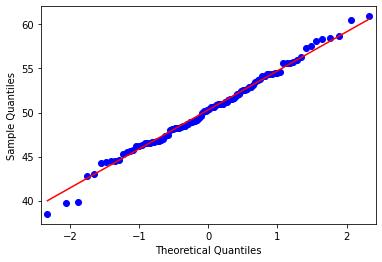

In [ ]:
# График QQ
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# запуск генератора случайных чисел
seed(1)
# генерирация вектора значений
data = 5 * randn(100) + 50
# построение q-q
qqplot(data, line='s')
pyplot.show()

При выполнении примера создается график QQ, показывающий степень рассеяния точек на диагональной линии, точно соответствующий ожидаемому шаблону выборки из распределения Гаусса.

Есть несколько небольших отклонений, особенно в нижней части графика, чего и следовало ожидать, учитывая небольшой размер выборки.

## Статистические тесты нормальности

Существует множество статистических тестов, которые мы можем использовать для количественной оценки того, соответствует ли выборка распределению Гаусса.

Каждый тест делает разные предположения и рассматривает разные аспекты данных.

В этом разделе мы рассмотрим 3 часто используемых теста, которые вы можете применить к нашему образцу данных.

### Интерпретация теста

Прежде чем применять статистические тесты, мы должны научиться интерпретировать результаты.

Каждый тест вернет минимум два показателя:

- **Статистика**: это количество, рассчитанное в тесте. Его можно интерпретировать путем сравнения с критическими значениями из распределения тестовой статистики.
- **p-значение**: используется для интерпретации теста - была ли выборка взята из распределения Гаусса.

Каждый тест вычисляет специфичную для теста статистику. Эта статистика может помочь в интерпретации результата, хотя для этого может потребоваться более глубокое знание статистики и более глубокое знание конкретного статистического теста. Вместо этого p-значение можно использовать для быстрой и точной интерпретации статистики в практических приложениях.

Тесты предполагают, что выборка была взята из распределения Гаусса. Технически это называется **нулевой гипотезой** или **H0**. Выбирается пороговый уровень, называемый **альфа**, обычно 5% (или 0,05), который используется для интерпретации p-значения.

В реализации этих тестов с **SciPy** значение p интерпретируется следующим образом:
- **p <= alpha**: отклонить H0, распределение не нормальное.
- **p > alpha**: не удалось отклонить H0, распределение нормальное.

Это означает, что мы ищем результаты с большим p-значением, чтобы подтвердить, что наша выборка, была взята из распределения Гаусса.

Результат выше 5% не означает, что **нулевая гипотеза верна**. Значение p — это не вероятность того, что данные соответствуют распределению Гаусса; его можно рассматривать как значение, которое помогает нам интерпретировать статистический тест.

### Тест Шапиро-Уилка

**Тест Шапиро-Уилка** (названного в честь Сэмюэля Шапиро и Мартина Уилка) оценивает выборку данных и определяет, насколько вероятно, что данные были получены из распределения Гаусса.

На практике **критерий Шапиро-Уилка** считается надежным критерием нормальности. Есть некоторые предположения, что этот критерий может быть пригоден для небольших выборок данных, например несколько тысяч наблюдений или меньше.

Функция пакета SciPy [shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) вычисляет критерий Шапиро-Уилка для заданного набора данных. Функция возвращает как W-статистику, рассчитанную тестом, так и p-значение.

Предположения

- Наблюдения в каждой выборке независимы и одинаково распределены.

Интерпретация

- H0: выборка имеет распределение Гаусса.
- H1: выборка не имеет распределения Гаусса.


In [ ]:
# Тест Shapiro-Wilk
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# запуск генератора случайных чисел
seed(1)
# генерирация вектора значений
data = 5 * randn(100) + 50
# тест на нормальность
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# интерпретация результатов
alpha = 0.05
if p > alpha:
	print('Соответствие Гауссову распределению (не удалось отклонить H0)')
else:
	print('Несоответствие Гауссову распределению (отклонение H0)')

Statistics=0.992, p=0.822
Соответствие Гауссову распределению (не удалось отклонить H0)


Выполнение примера сначала вычисляет тест для выборки данных, затем печатает статистику и вычисленное значение p.

Значение p показывает, что данные взяты из распределения Гаусса.

### Тест Д'Агостино K^2

**Тест [Д'Агостино K ^ 2](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)**(названного в честь Ральфа Д'Агостино) вычисляет сводную статистику по данным, а именно **эксцесс** и **асимметрию**, чтобы определить, отклоняется ли распределение данных от нормального распределения.

**Перекос (Skew)** — это количественная оценка того, насколько распределение смещено влево или вправо. Это мера асимметрии в распределении.

**Эксцесс (Kurtosis)** количественно определяет, какая часть распределения находится в хвосте. Это простой и часто используемый статистический тест на нормальность.

Тест D'Agostino K^2 доступен через функцию **normaltest()** пакета **SciPy** и возвращает статистику теста и значение p.

In [ ]:
# Тест D'Agostino and Pearson's
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# запуск генератора случайных чисел
seed(1)
# генерирация вектора значений
data = 5 * randn(100) + 50
# тест на нормальность
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# интерпретация результатов
alpha = 0.05
if p > alpha:
	print('Соответствие Гауссову распределению (не удалось отклонить H0)')
else:
	print('Несоответствие Гауссову распределению (отклонение H0)')

Statistics=0.102, p=0.950
Соответствие Гауссову распределению (не удалось отклонить H0)


Выполнение примера вычисляет статистику и печатает статистику и значение p.

Значение p интерпретируется относительно альфа 5% и обнаруживает, что набор тестовых данных не имеет значительных отклонений от нормы.

### Тест Андерсона-Дарлинга

**Тест Андерсона-Дарлинга** (названный в честь Теодора Андерсона и Дональда Дарлинга) — это статистический тест, который можно использовать для оценки того, является ли выборка данных одной из известных выборок. Его можно использовать для проверки нормальности выборки данных. 

Тест представляет собой модифицированную версию более сложного **непараметрического статистического теста согласия**, называемого **тестом Колмогорова-Смирнова**.

Особенностью теста Андерсона-Дарлинга является то, что он возвращает **список критических значений**, а не одно значение p. Это может послужить основой для более тщательного рассмотрения и интерпретации результата.

Функция **anderson()** пакета **SciPy** реализует тест Андерсона-Дарлинга. Он принимает в качестве параметров выборку данных и имя распределения для его проверки. По умолчанию тест будет проверять распределение Гаусса (dist='norm').

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# запуск генератора случайных чисел
seed(1)
# генерирация вектора значений
data = 5 * randn(100) + 50
# тест на нормальность
result = anderson(data)
print('Статистика: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, данные соответствуют нормальному распределению (не удалось отклонить гипотезу H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, данные не соответствуют нормальному распределению (отклонена гипотеза H0)' % (sl, cv))

Статистика: 0.220
15.000: 0.555, данные соответствуют нормальному распределению (не удалось отклонить гипотезу H0)
10.000: 0.632, данные соответствуют нормальному распределению (не удалось отклонить гипотезу H0)
5.000: 0.759, данные соответствуют нормальному распределению (не удалось отклонить гипотезу H0)
2.500: 0.885, данные соответствуют нормальному распределению (не удалось отклонить гипотезу H0)
1.000: 1.053, данные соответствуют нормальному распределению (не удалось отклонить гипотезу H0)


При выполнении примера вычисляется статистика по набору тестовых данных и печатаются критические значения.

Критические значения в статистическом тесте представляют собой **диапазон предварительно определенных границ значимости**, при которых H0 не может быть отклонена, если вычисленная статистика меньше критического значения. Тест возвращает не просто одно значение p, а критические значения для диапазона различных и часто используемых уровней значимости.

Данные соответствуют нормальному распределению, если вычисленная тестовая статистика меньше критического значения при выбранном уровне значимости. Мы видим, что на каждом уровне значимости тест показал, что данные следуют нормальному распределению.